# FURNITURE SALES FORECASTING

## Import Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')
import os 
os.getcwd()

'C:\\Users\\ksvg7'

## Load the Data

In [4]:
df = pd.read_csv(r"C:\Users\ksvg7\Desktop\LMS\LMS ML\Time Series Project\Dataset\Super_Store.csv", encoding='latin1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [7]:
df.shape

(2121, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [11]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [13]:
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

In [17]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121,2121,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,2016-04-30 03:54:13.748231680,2016-05-04 01:54:44.299858432,55726.556341,349.834887,3.785007,0.173923,8.699327
min,1.000000,2014-01-06 00:00:00,2014-01-10 00:00:00,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,2015-05-26 00:00:00,2015-05-31 00:00:00,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,2016-06-20 00:00:00,2016-06-23 00:00:00,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,2017-05-14 00:00:00,2017-05-18 00:00:00,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,4416.174000,14.000000,0.700000,1013.127000
std,2885.740258,NaN,NaN,32261.888225,503.179145,2.251620,0.181547,136.049246


In [19]:
df.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121
unique,1764,4,707,707,3,1,371,48,4,375,1,4,380
top,US-2015-129007,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,California,West,FUR-FU-10004270,Furniture,Furnishings,KI Adjustable-Height Table
freq,4,1248,15,15,1113,2121,192,444,707,16,2121,957,18


In [51]:
df.Category.value_counts()

Category
Furniture    2121
Name: count, dtype: int64

In [21]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [23]:
df1=df[['Order Date','Sales']]
df1

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2015-10-11,957.5775
3,2014-06-09,48.8600
4,2014-06-09,1706.1840
...,...,...
2116,2015-03-19,383.4656
2117,2016-12-05,13.4000
2118,2015-09-06,85.9800
2119,2014-01-21,25.2480


In [25]:
df['Order Date'].min(), df['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [27]:
df1.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [29]:
furniture=df1.sort_values('Order Date',ascending=True)
furniture

,Order Date,Sales
1577,2014-01-06,2573.820
1626,2014-01-07,76.728
181,2014-01-10,51.940
150,2014-01-11,9.940
631,2014-01-13,545.940
...,...,...
1619,2017-12-29,258.750
1617,2017-12-29,1207.840
1057,2017-12-29,101.120
1618,2017-12-29,300.980


In [31]:
furniture = df1.groupby('Order Date')['Sales'].sum().reset_index().sort_values(by='Order Date', ascending=True)
furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


<Axes: >

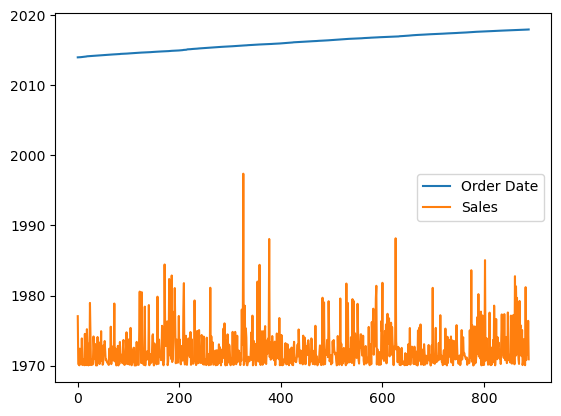

In [33]:
furniture.plot()

In [ ]:
### set date/time index

In [35]:
if 'Order Date' in furniture.columns:
    furniture = furniture.set_index('Order Date')
furniture

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


<Axes: xlabel='Order Date'>

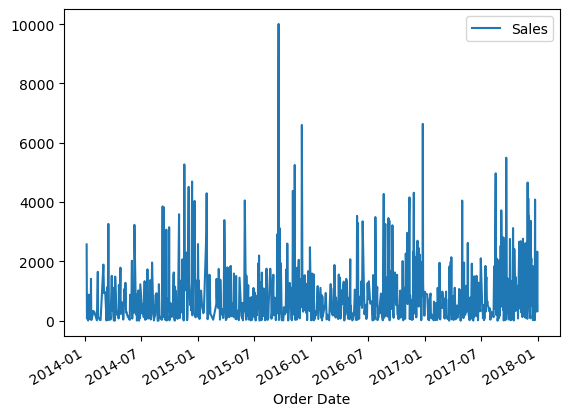

In [37]:
furniture.plot()

### Equally spaced date/time

In [39]:
y = furniture['Sales'].resample('MS').sum()
y

Order Date
2014-01-01     6242.5250
2014-02-01     1839.6580
2014-03-01    14573.9560
2014-04-01     7944.8370
2014-05-01     6912.7870
2014-06-01    13206.1256
2014-07-01    10821.0510
2014-08-01     7320.3465
2014-09-01    23816.4808
2014-10-01    12304.2470
2014-11-01    21564.8727
2014-12-01    30645.9665
2015-01-01    11739.9416
2015-02-01     3134.3740
2015-03-01    12499.7830
2015-04-01    10475.6985
2015-05-01     9374.9505
2015-06-01     7714.1790
2015-07-01    13674.4200
2015-08-01     9638.5922
2015-09-01    26273.0230
2015-10-01    12026.6235
2015-11-01    30880.8325
2015-12-01    23085.8192
2016-01-01     7622.7430
2016-02-01     3925.5510
2016-03-01    12801.0920
2016-04-01    13212.0900
2016-05-01    15119.8350
2016-06-01    13070.5720
2016-07-01    13068.5190
2016-08-01    12483.2323
2016-09-01    27262.8809
2016-10-01    11872.5770
2016-11-01    31783.6288
2016-12-01    36678.7150
2017-01-01     5964.0320
2017-02-01     6866.3374
2017-03-01    10893.4448
2017-04-01    

In [41]:
y.shape

(48,)

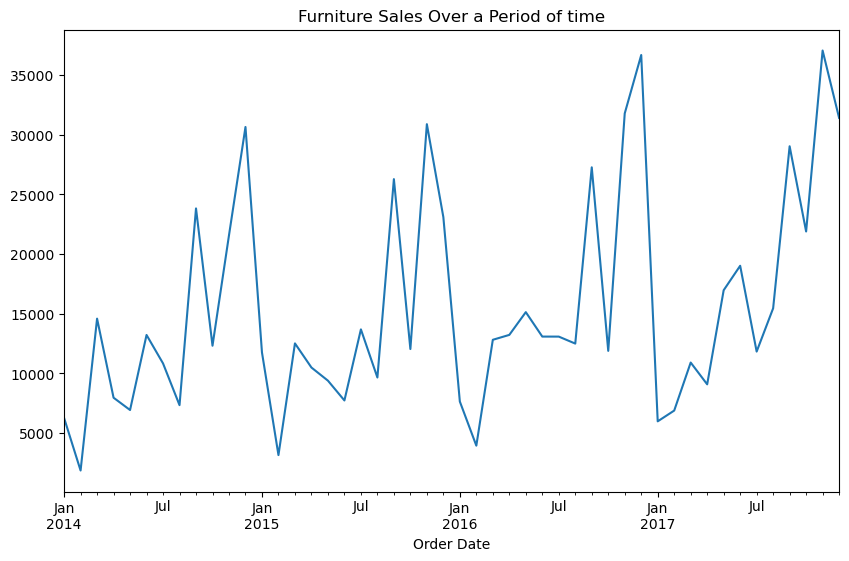

In [43]:
y.plot(figsize=(10, 6))
plt.title("Furniture Sales Over a Period of time")
plt.show()

### TRAIN TEST SPLIT-MANUALLY

In [47]:
train=y.loc[:'2016-12-01']
train.tail()

Order Date
2016-08-01    12483.2323
2016-09-01    27262.8809
2016-10-01    11872.5770
2016-11-01    31783.6288
2016-12-01    36678.7150
Freq: MS, Name: Sales, dtype: float64

In [49]:
test=y.loc['2017-01-01':]
test.head()

Order Date
2017-01-01     5964.0320
2017-02-01     6866.3374
2017-03-01    10893.4448
2017-04-01     9065.9581
2017-05-01    16957.5582
Freq: MS, Name: Sales, dtype: float64

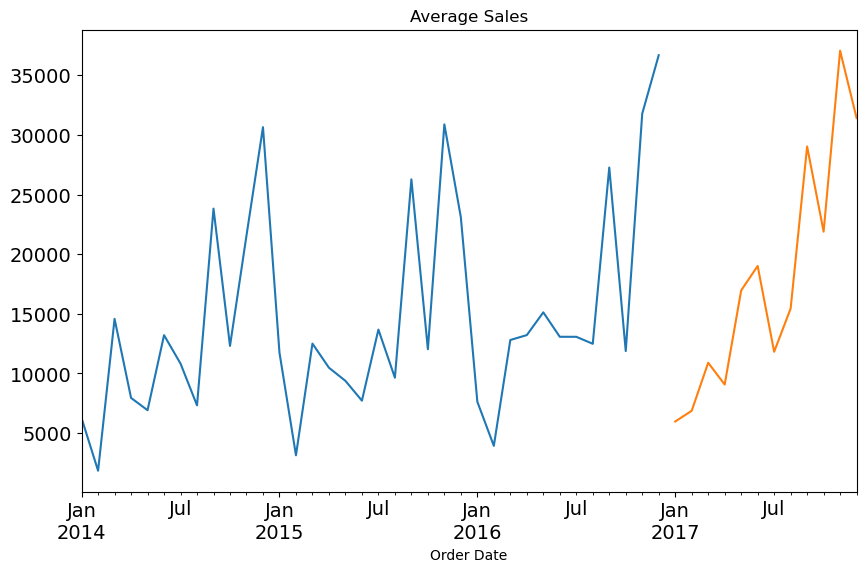

In [52]:
#Plotting data
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

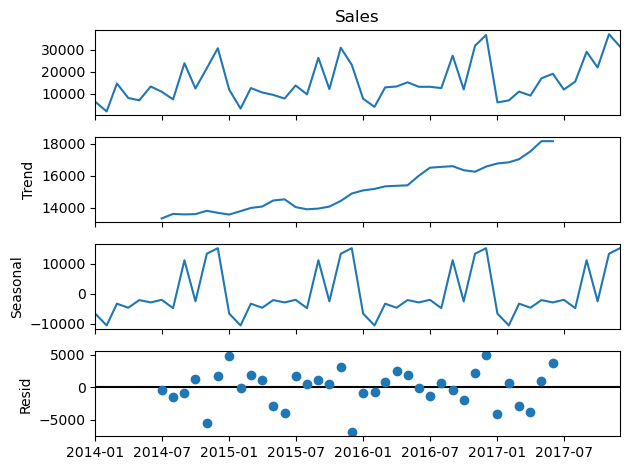

In [54]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
decomposition.plot()
plt.show()